## Importing All Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import time
import warnings
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
warnings.filterwarnings('ignore')
%matplotlib inline

## Importing Dataset i.e. Nabil Bank (nabil) Stock Price Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/MSc. Dissertation/Dataset/nabil.csv')

In [3]:
df.head()

,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
0,3/20/2011,"1,200.00","1,190.00","1,160.00","1,170.00",0.0,853,"1,000,811.00"
1,3/24/2011,"1,162.00","1,178.00","1,150.00","1,153.00",0.0,356,"412,649.00"
2,3/25/2011,"1,153.00","1,174.00","1,145.00","1,174.00",0.0,702,"807,507.00"
3,3/27/2011,"1,174.00","1,160.00","1,120.00","1,147.00",0.0,"1,426.00","1,619,270.00"
4,3/28/2011,"1,147.00","1,150.00","1,110.00","1,132.00",0.0,352,"393,534.00"


In [4]:
df.tail()

,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
3078,9/18/2024,562,565,550,556,-0.93,"68,886.00","38,431,118.40"
3079,9/22/2024,556,578,556,562,1.08,"55,026.00","31,054,968.70"
3080,9/23/2024,573.2,573.2,555,568,1.07,"123,568.00","69,577,465.00"
3081,9/24/2024,567,567,552.1,553.5,-2.55,"66,337.00","36,962,336.00"
3082,9/25/2024,550,560,545.1,555,0.27,"50,441.00","27,867,328.70"


In [5]:
df.duplicated().sum()

1

## Copying the dataset for future use

In [6]:
df1 = df.copy()
df1.reset_index(inplace=True)

### Renaming and Dropping unwanted column

In [7]:
df.drop(['% Change', 'Turnover'], axis=1, inplace=True)
df = df.rename(columns = {
    'Ltp': 'Close',
    'Qty': 'Volume'
})

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)
df['Close'] = df['Close'].str.replace(',', '').astype(float)
df['Volume'] = df['Volume'].str.replace(',', '').astype(float).astype(int)

### Splitting into features and target

In [9]:
X = df.drop(['Close', 'Date'], axis=1)
y = df['Close']

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Splitting the data into train and test set

In [11]:
# X_train, X_test, y_train, y_test = X[:round(X.shape[0]*0.8)], X[round(X.shape[0]*0.8):], y[:round(y.shape[0]*0.8)], y[round(y.shape[0]*0.8):]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building using Linear Regression

In [12]:
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.01)
start = time.time()
model.fit(X_train, y_train)
end = time.time()
print('Training Time:', end-start)

Training Time: 1.0006632804870605


In [13]:
model.score(X_train, y_train)

0.9987978687284154

In [14]:
predicted = model.predict(X_test)
predicted

array([1139.9227566 , 1605.35477057,  686.92496674, 1757.56994328,
       1068.6935886 , 2298.47257089, 1138.7720581 ,  916.9322063 ,
        589.5667471 , 1639.92643747,  830.29941571, 1987.44659073,
       1885.1356764 , 1511.52544244, 1530.5416601 , 1685.99956873,
        721.91571505, 1947.64374763,  757.80336723,  876.40007133,
        937.09710483, 1606.77912252, 1906.80947064,  454.59101771,
        826.19084304,  901.39887508, 2399.93434303, 2486.36644752,
        927.38735942,  974.16296745, 1453.83884721,  600.48218737,
       2361.41477268, 1287.89594265, 1280.61290015, 1474.52082462,
       1239.02418681, 1057.25353393,  669.39051538, 1421.52757878,
        939.00850537,  611.06740014, 1478.73016271,  575.62171016,
       1389.44143933,  912.59079108, 2403.39684853,  993.10757279,
       1489.05120795, 1969.73312869, 1730.7663007 ,  474.91985603,
        789.67468044,  865.46624073, 1874.37416813, 2441.7703974 ,
       1122.97836731,  684.78268444,  983.00307477, 1259.20304

In [15]:
y_test

,Close
1505,1145.0
2398,1598.0
1814,683.0
511,1765.0
1565,1059.0
...,...
1177,2280.0
1034,2280.0
2404,1579.0
168,873.0


In [16]:
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})
for a in prediction.index:
    for b in df.index:
        if a == b:
            prediction['Date'] = df['Date']
prediction.set_index('Date', inplace=True)
prediction.sort_index(inplace=True)
prediction

,Actual,Predicted
Date,,
2011-03-20,1170.0,1179.011593
2011-04-13,1218.0,1140.720130
2011-04-28,1046.0,1057.155953
2011-05-04,1019.0,1025.547050
2011-05-10,1050.0,1038.921063
...,...,...
2024-07-31,649.3,643.730386
2024-08-07,631.5,615.630785
2024-09-04,595.0,610.686459


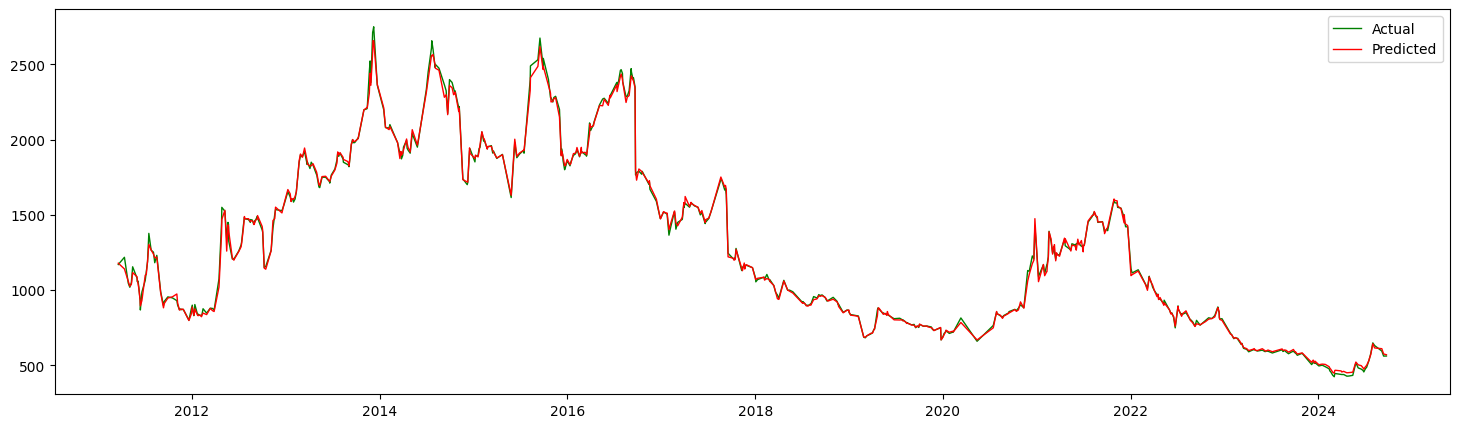

In [17]:
plt.figure(figsize=(18, 5))
plt.plot(prediction.Actual, label='Actual', color='g', linewidth=1)
plt.plot(prediction.Predicted, label='Predicted', color='r', linewidth=1)
plt.legend()
plt.show()


## Calculating the Performance Evaluation Metrics

In [18]:
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicted)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 487.6500820597316
Root Mean Squared Error: 22.08280059366863
Mean Absolute Error: 14.047480746586505


### Here the performance metrics are too much higher so, we have to tune the hyperparameters.

In [19]:
model_params = {
            'C': [0.1, 1, 10, 100, 1000],
            'kernel': ['rbf','linear', 'poly', 'sigmoid'],
            'gamma': [0.01, 0.1, 1, 'auto']
            }


grid_search = GridSearchCV(SVR(), model_params, cv=5, return_train_score=False)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.01, 0.1, 1, 'auto'],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']})

In [20]:
grid_search.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [21]:
grid_search.best_score_

0.9994360502872146

In [22]:
grid_search_prediction = grid_search.predict(X_test)
grid_search_prediction

array([1150.17362641, 1598.72032683,  685.84971495, 1768.22009423,
       1070.9198717 , 2320.06357093, 1151.13027527,  924.50541597,
        581.43541748, 1620.3655467 ,  832.6234604 , 1982.18992812,
       1884.42401128, 1508.79974355, 1538.55660355, 1667.19715731,
        722.55544576, 1959.16992422,  757.42369245,  882.72995793,
        940.23110384, 1610.70790143, 1896.64987522,  433.22423707,
        828.25474195,  903.42423374, 2416.83844237, 2529.4078271 ,
        933.98489093,  971.85096023, 1458.39275055,  590.94261831,
       2376.445339  , 1301.70404495, 1275.1083345 , 1464.36016664,
       1243.33437285, 1067.08831725,  666.30464594, 1403.0873152 ,
        944.58483345,  604.37050273, 1475.01737279,  563.37854142,
       1354.03781675,  915.70781658, 2416.94299759,  995.85329203,
       1495.25551298, 1974.31477662, 1748.81031102,  459.92074861,
        790.42874962,  872.95689207, 1887.01490562, 2482.79718203,
       1168.56905581,  680.86679553,  986.75740127, 1308.62349

In [23]:
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': grid_search_prediction})
for a in prediction.index:
    for b in df.index:
        if a == b:
            prediction['Date'] = df['Date']
prediction.set_index('Date', inplace=True)
prediction.sort_index(inplace=True)
prediction

,Actual,Predicted
Date,,
2011-03-20,1170.0,1169.637002
2011-04-13,1218.0,1183.554112
2011-04-28,1046.0,1047.102035
2011-05-04,1019.0,1020.637335
2011-05-10,1050.0,1048.103344
...,...,...
2024-07-31,649.3,646.167001
2024-08-07,631.5,625.583620
2024-09-04,595.0,601.579845


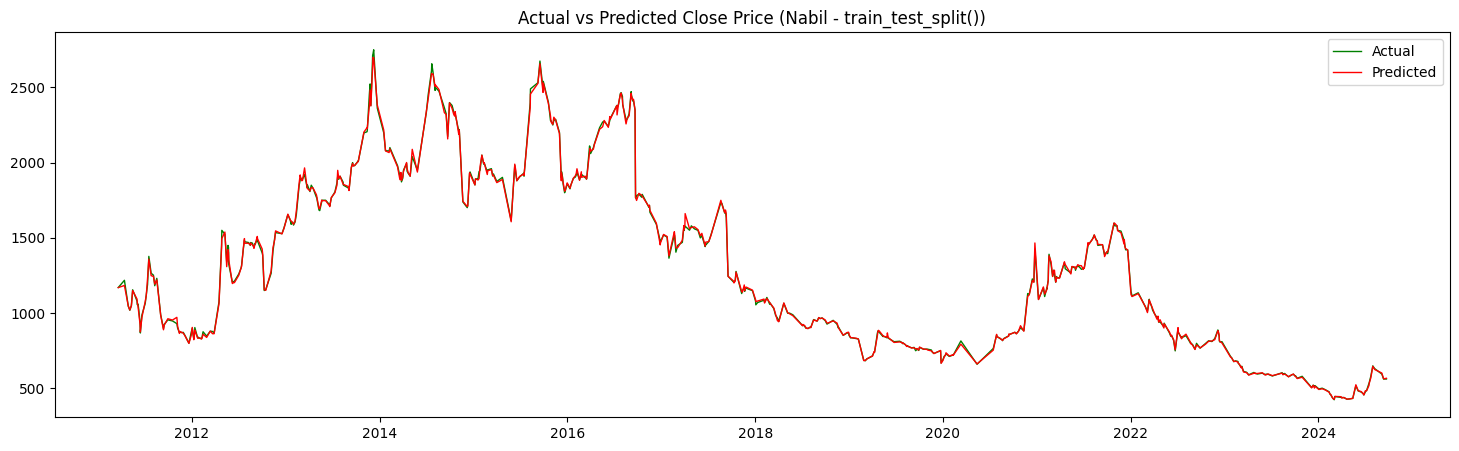

In [24]:
plt.figure(figsize=(18, 5))
plt.plot(prediction.Actual, label='Actual', color='g', linewidth=1)
plt.plot(prediction.Predicted, label='Predicted', color='r', linewidth=1)
plt.title('Actual vs Predicted Close Price (Nabil - train_test_split())')
plt.legend()
plt.show()

### Performance Evaluation Metrics after Hyperparameter Tuning

In [25]:
mse = mean_squared_error(y_test, grid_search_prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, grid_search_prediction)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 182.9423148066287
Root Mean Squared Error: 13.52561698432381
Mean Absolute Error: 8.739860588770972
